## Loan Approval Prediction

### The following code predicts whether the individual will be approved of loan or not based upon some deciding factors.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("LoanApprovalPrediction.csv")

## Data Cleaning

In [5]:
df = data.drop(['Loan_ID'], axis = 1)

In [6]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
# Converting the string values to integers as direct conversion from string to integers was giving an error.

to_numeric = {'Male': 1, 'Female': 0,
'Yes': 1, 'No': 0,
'Graduate': 1, 'Not Graduate': 0,
'Urban': 1, 'Semiurban': 2,'Rural': 0,
'Y': 1, 'N': 0,
'3+': 3}

# Modifying the dataset
df = df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

C:\Users\riddhi\AppData\Local\Temp\ipykernel_16560\1256637038.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)


'# convertind the Dependents column\nIncome = pd.to_numeric(df.ApplicantIncome)\n\n# dropping the previous Dependents column\ndf.drop([\'ApplicantIncome\'], axis = 1, inplace = True)\n\n# concatination of the new Dependents column with both datasets\ndf = pd.concat([df, Income], axis = 1)\n\n# checking the our manipulated dataset for validation\nprint(f"training set (row, col): {df.shape}")\nprint(df.info())'

In [8]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,NaN,360.0,1.0,1,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,0,1
594,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,0,1
595,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,1,1
596,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [ ]:
df.describe()

Dealing with missing values, and sorting the data

In [10]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       49
LoanAmount           21
Loan_Amount_Term     14
Dependents           12
Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#filling the missing data
print("Original data\n\n","-"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


for i in null_cols:
    print(f"{i}:\n{df[i].value_counts()}\n","-"*50)
    df[i] = df[i].fillna(
    df[i].dropna().mode().values[0] )   

    
df.isnull().sum().sort_values(ascending=False)
print("Dealing with missing values\n\n","-"*50,"\n")
for col in null_cols:
    print(f"\n{i}:\n{df[i].value_counts()}\n","-"*50)

Original data

 -------------------------------------------------- 

Credit_History:
Credit_History
1.0    512
0.0     86
Name: count, dtype: int64
 --------------------------------------------------
Self_Employed:
Self_Employed
0    488
1    110
Name: count, dtype: int64
 --------------------------------------------------
LoanAmount:
LoanAmount
120.0    41
110.0    16
100.0    15
187.0    12
128.0    11
         ..
72.0      1
240.0     1
214.0     1
59.0      1
253.0     1
Name: count, Length: 199, dtype: int64
 --------------------------------------------------
Dependents:
Dependents
0.0    350
1.0    101
2.0     99
3.0     48
Name: count, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
Loan_Amount_Term
360.0    514
180.0     43
480.0     14
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
 --------------------------------------------------
Gender:
Gender
1    487
0    111
Name: co

## Exploratory Data Analysis

In [11]:
print(data.shape)  
print(data.ndim)   
print(data.size)   
print(data.isna().sum())  
print(data.info())

(598, 13)
2
7774
Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   5

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,120.0,360.0,1.0,1,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [15]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
593,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,0,1
594,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,0,1
595,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,1,1
596,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,1,1
597,0,0,0.0,1,1,4583,0.0,133.0,360.0,0.0,2,0


## Data Visualisation

Comparison between the Loan amount term and Loan status

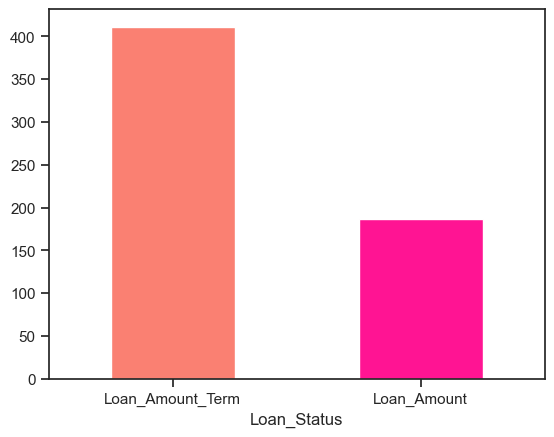

In [46]:
df["Loan_Status"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('Loan_Amount_Term', 'Loan_Amount'),rotation=0);

Taking the histograms of the basic information abou the individuals

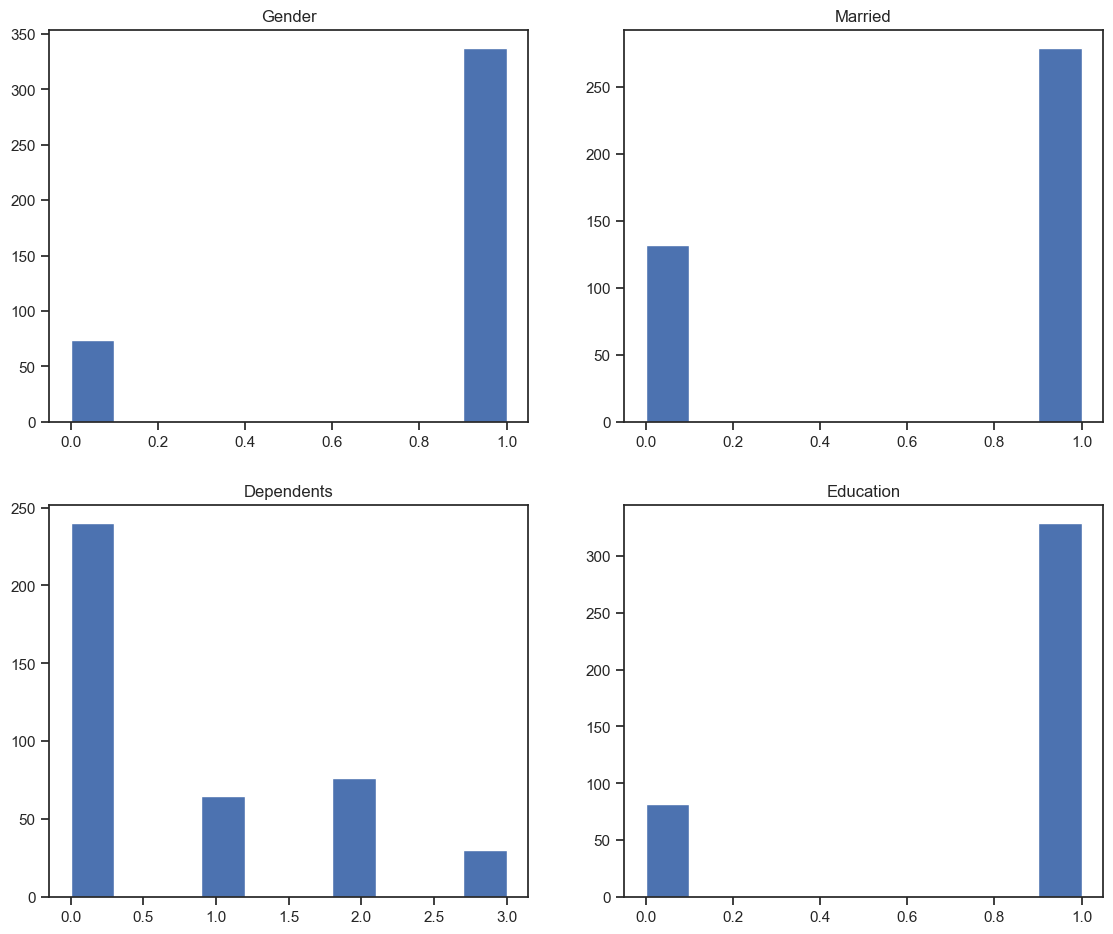

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Gender')
ax[0,0].hist(df.Gender[data.Loan_Status=='Y']);
ax[0,1].set_title('Married')
ax[0,1].hist(df.Married[data.Loan_Status=='Y']);
ax[1,0].set_title('Dependents')
ax[1,0].hist(df.Dependents[data.Loan_Status=='Y']);
ax[1,1].set_title('Education')
ax[1,1].hist(df.Education[data.Loan_Status=='Y']);

Taking the histogram for employment-related information

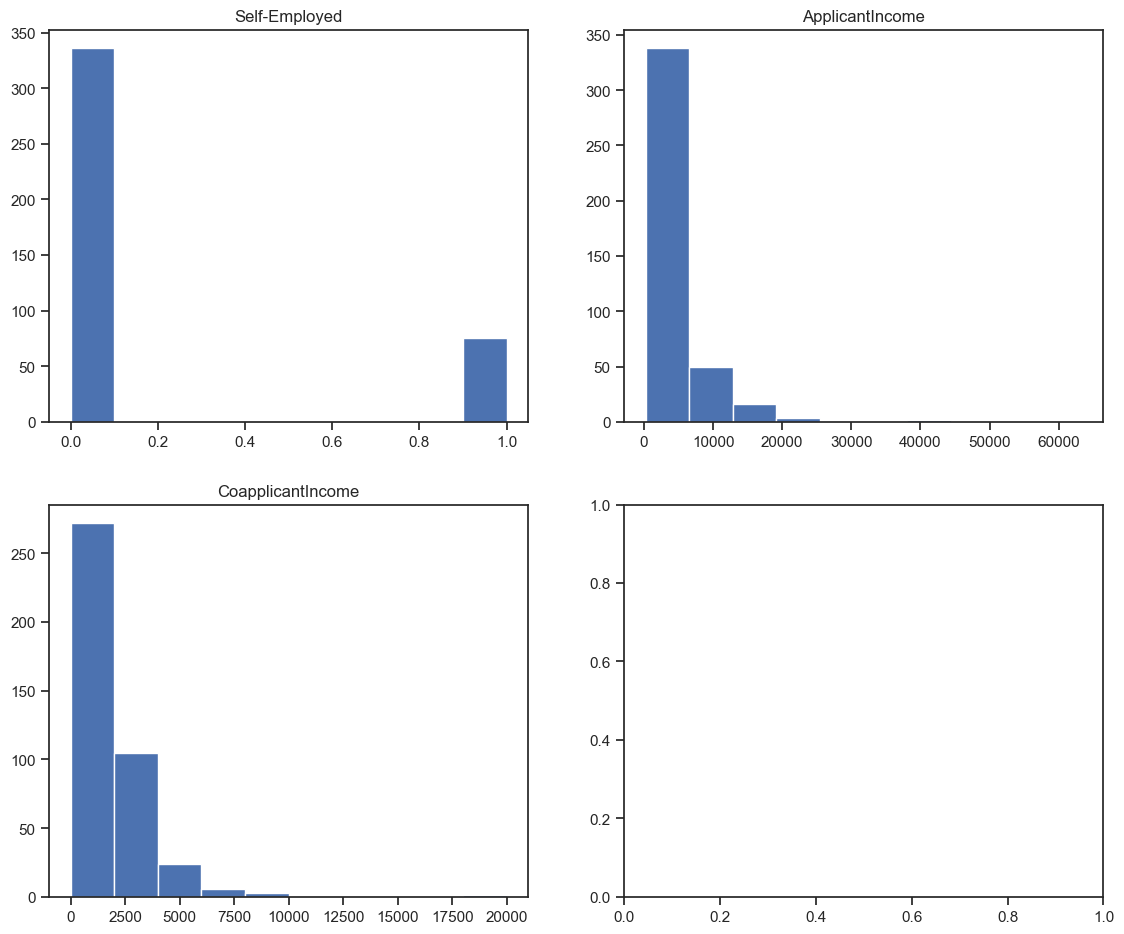

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Self-Employed')
ax[0,0].hist(df.Self_Employed[data.Loan_Status=='Y']);
ax[0,1].set_title('ApplicantIncome')
ax[0,1].hist(df.ApplicantIncome[data.Loan_Status=='Y']);
ax[1,0].set_title('CoapplicantIncome')
ax[1,0].hist(df.CoapplicantIncome[data.Loan_Status=='Y']);

Taking the histograms for Loan-related information

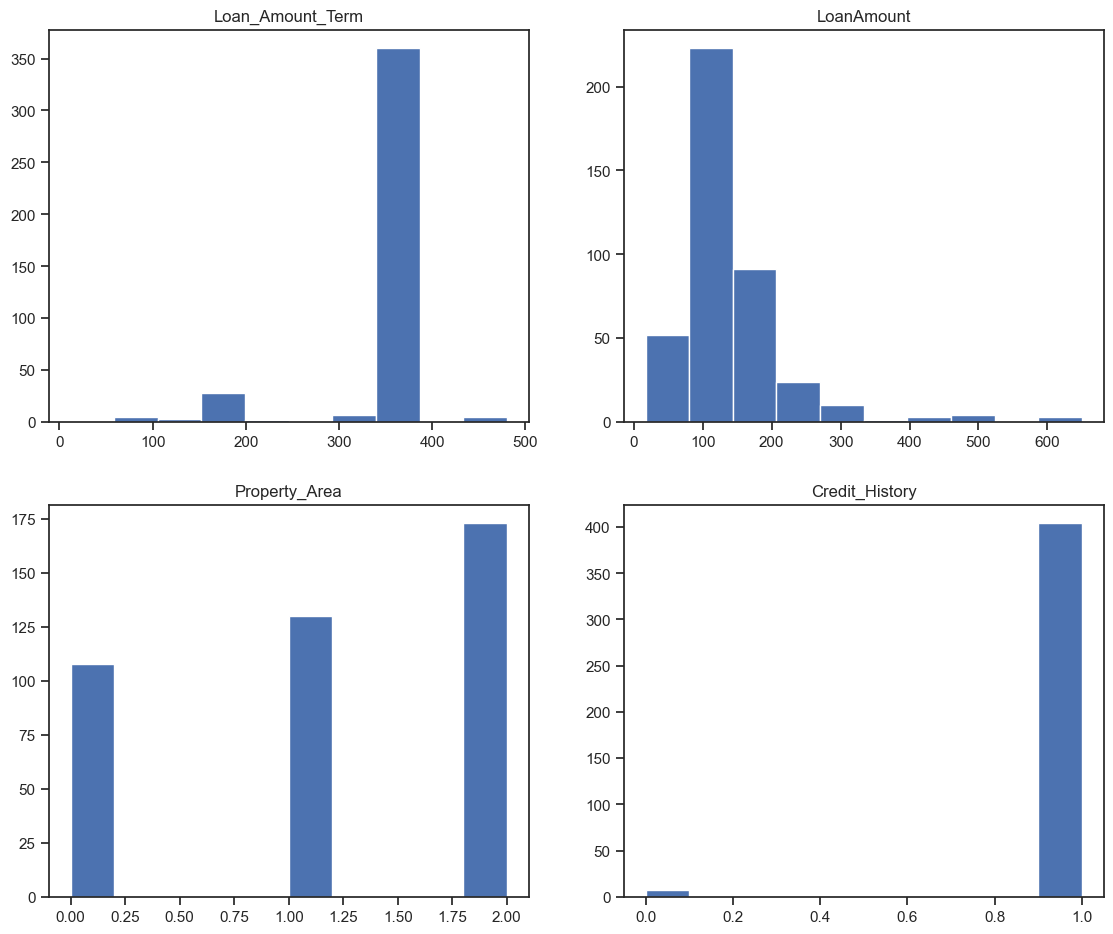

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,1].set_title('LoanAmount')
ax[0,1].hist(df.LoanAmount[data.Loan_Status=='Y']);
ax[0,0].set_title('Loan_Amount_Term')
ax[0,0].hist(df.Loan_Amount_Term[data.Loan_Status=='Y']);
ax[1,1].set_title('Credit_History')
ax[1,1].hist(df.Credit_History[data.Loan_Status=='Y']);
ax[1,0].set_title('Property_Area')
ax[1,0].hist(df.Property_Area[data.Loan_Status=='Y']);

Comparison of Gender vs Married for Loan Status

Gender vs Married


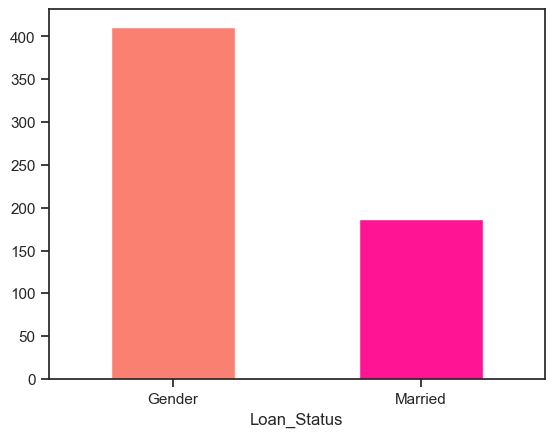

In [50]:
print("Gender vs Married")
df["Loan_Status"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('Gender', 'Married'),rotation=0);

Comparison of Education vs Self_Employed for Loan Status

Education vs Self_Employed


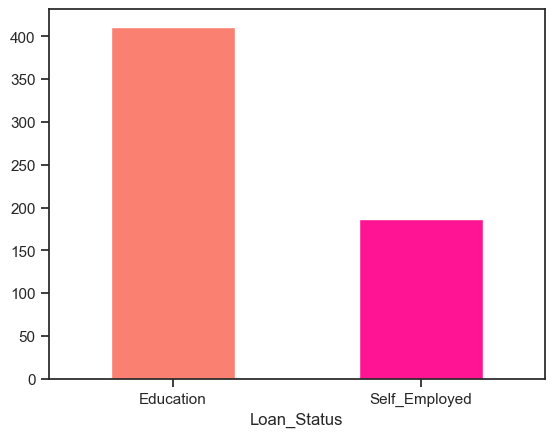

In [51]:
print("Education vs Self_Employed")
df["Loan_Status"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('Education', 'Self_Employed'),rotation=0);

Comparison of Applicant Income vs Coapplicant Income for Loan Status

ApplicantIncome vs CoapplicantIncome


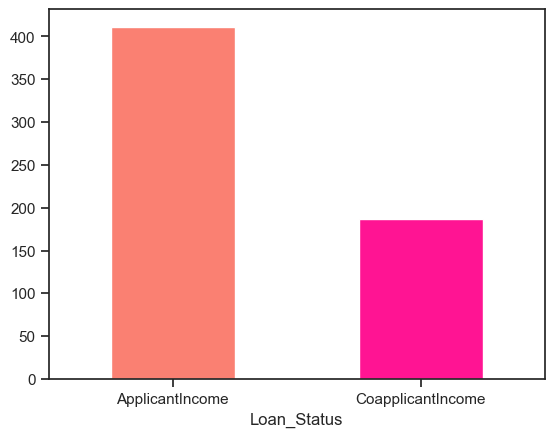

In [52]:
print("ApplicantIncome vs CoapplicantIncome")
df["Loan_Status"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('ApplicantIncome', 'CoapplicantIncome'),rotation=0);

Comparison of Loan_Amount vs Loan_Amount_Term for Loan Status

Loan_Amount vs Loan_Amount_Term


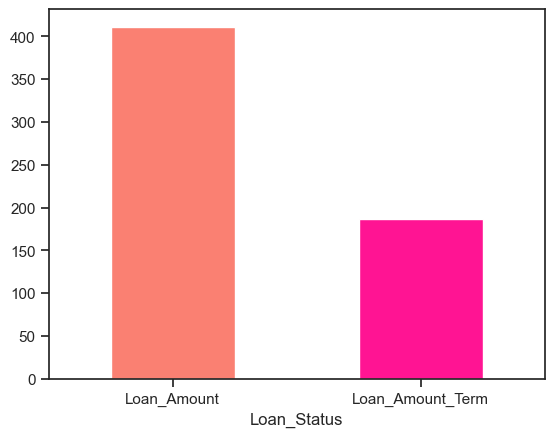

In [53]:
print("Loan_Amount vs Loan_Amount_Term")
df["Loan_Status"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('Loan_Amount', 'Loan_Amount_Term'),rotation=0);

Comparison of Credit_History vs Property_Area for Loan Status

Credit_History vs Property_Area


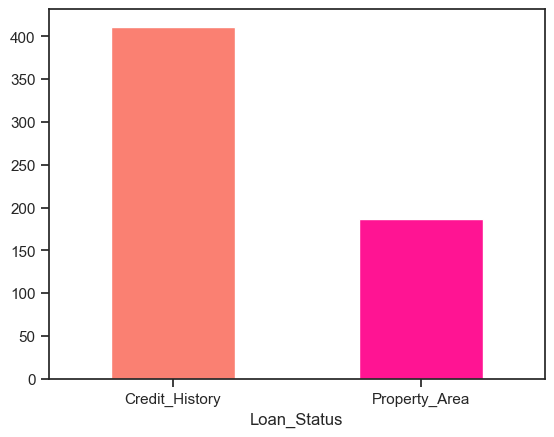

In [54]:
print("Credit_History vs Property_Area")
df["Loan_Status"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('Credit_History', 'Property_Area'),rotation=0);

Loan Status in function of applicant and co-applicant incomes

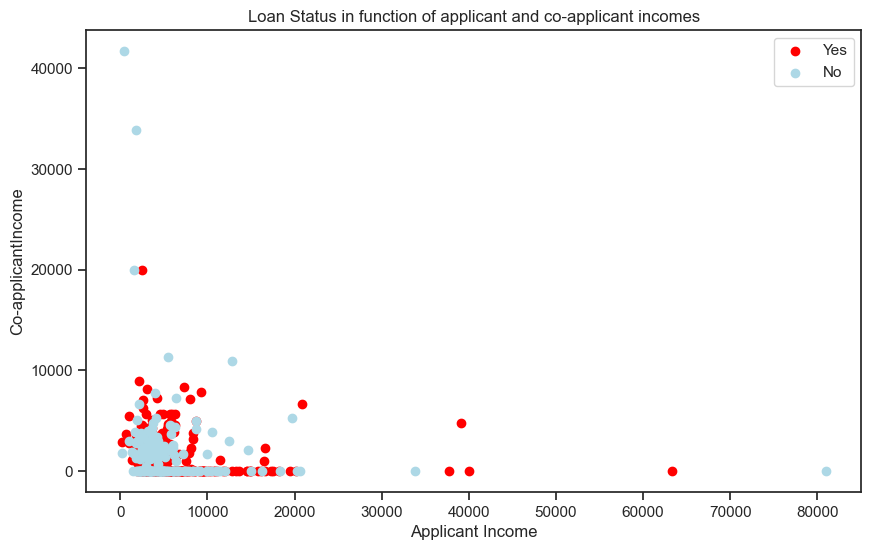

In [58]:
plt.figure(figsize=(10,6))

# Scatter with 'Yes' as Loan Status 
plt.scatter(data.ApplicantIncome[data.Loan_Status=='Y'],data.CoapplicantIncome[data.Loan_Status=='Y'],c="Red");

# Scatter with 'No' as Loan Status
plt.scatter(data.ApplicantIncome[data.Loan_Status=='N'],data.CoapplicantIncome[data.Loan_Status=='N'],c="lightblue");

plt.title("Loan Status in function of applicant and co-applicant incomes")
plt.xlabel("Applicant Income")
plt.ylabel("Co-applicantIncome")
plt.legend(["Yes","No"]);

Seaborn plot for all the dependencies

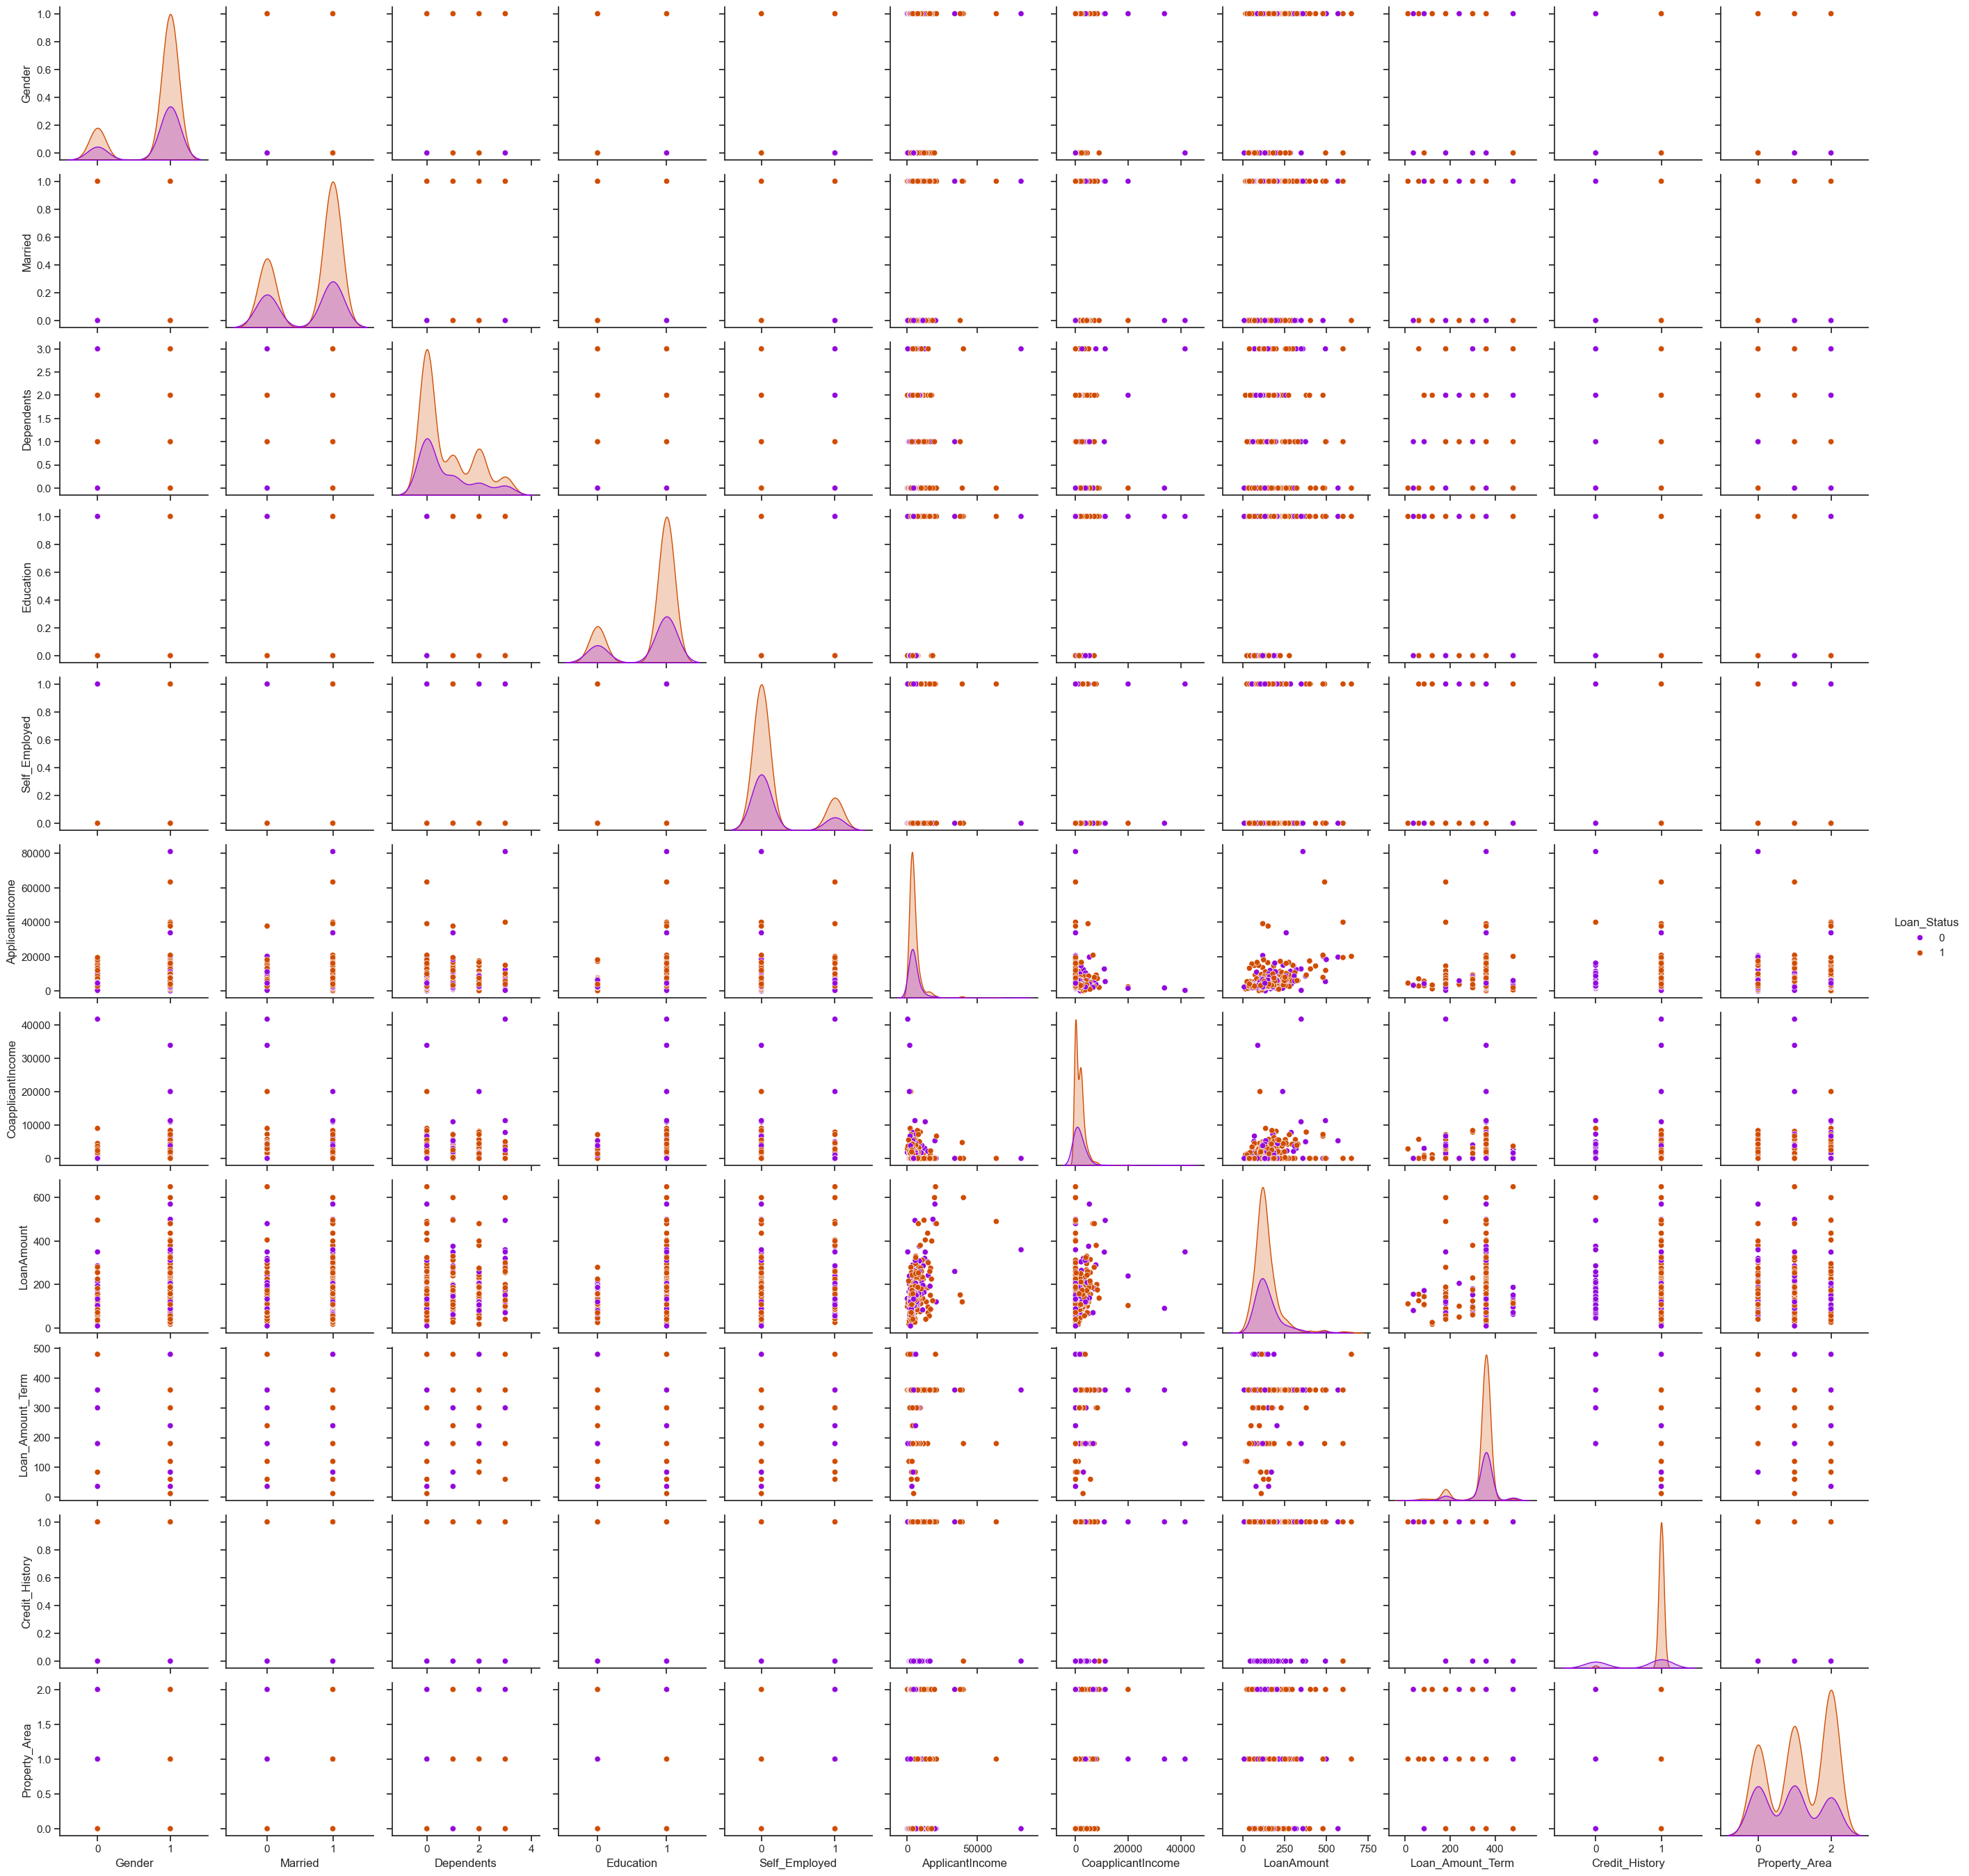

In [56]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,hue='Loan_Status',palette='gnuplot');

Correlation Matrix

In [45]:
#corelation matrix
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369612,0.172620,-0.048478,-0.028663,0.057386,0.083080,0.102857,-0.082771,0.012708,-0.109533,0.021239
Married,0.369612,1.000000,0.344500,-0.014369,-0.021441,0.042487,0.073830,0.144413,-0.101137,0.017964,0.011017,0.093183
Dependents,0.172620,0.344500,1.000000,-0.054050,0.040957,0.084744,0.036101,0.130968,-0.103481,-0.034664,0.008120,0.009105
Education,-0.048478,-0.014369,-0.054050,1.000000,0.015204,0.139349,0.065205,0.168081,0.075839,0.067300,0.059906,0.081617
Self_Employed,-0.028663,-0.021441,0.040957,0.015204,1.000000,0.140406,0.020877,0.115782,-0.033055,0.034679,-0.022267,-0.005605
ApplicantIncome,0.057386,0.042487,0.084744,0.139349,0.140406,1.000000,-0.109235,0.524091,-0.036617,-0.033683,-0.017368,-0.025248
CoapplicantIncome,0.083080,0.073830,0.036101,0.065205,0.020877,-0.109235,1.000000,0.207847,-0.059922,0.014622,-0.014658,-0.058194
LoanAmount,0.102857,0.144413,0.130968,0.168081,0.115782,0.524091,0.207847,1.000000,0.046059,-0.010498,-0.022339,-0.049285
Loan_Amount_Term,-0.082771,-0.101137,-0.103481,0.075839,-0.033055,-0.036617,-0.059922,0.046059,1.000000,-0.001380,0.014383,-0.018931
Credit_History,0.012708,0.017964,-0.034664,0.067300,0.034679,-0.033683,0.014622,-0.010498,-0.001380,1.000000,0.036262,0.535638


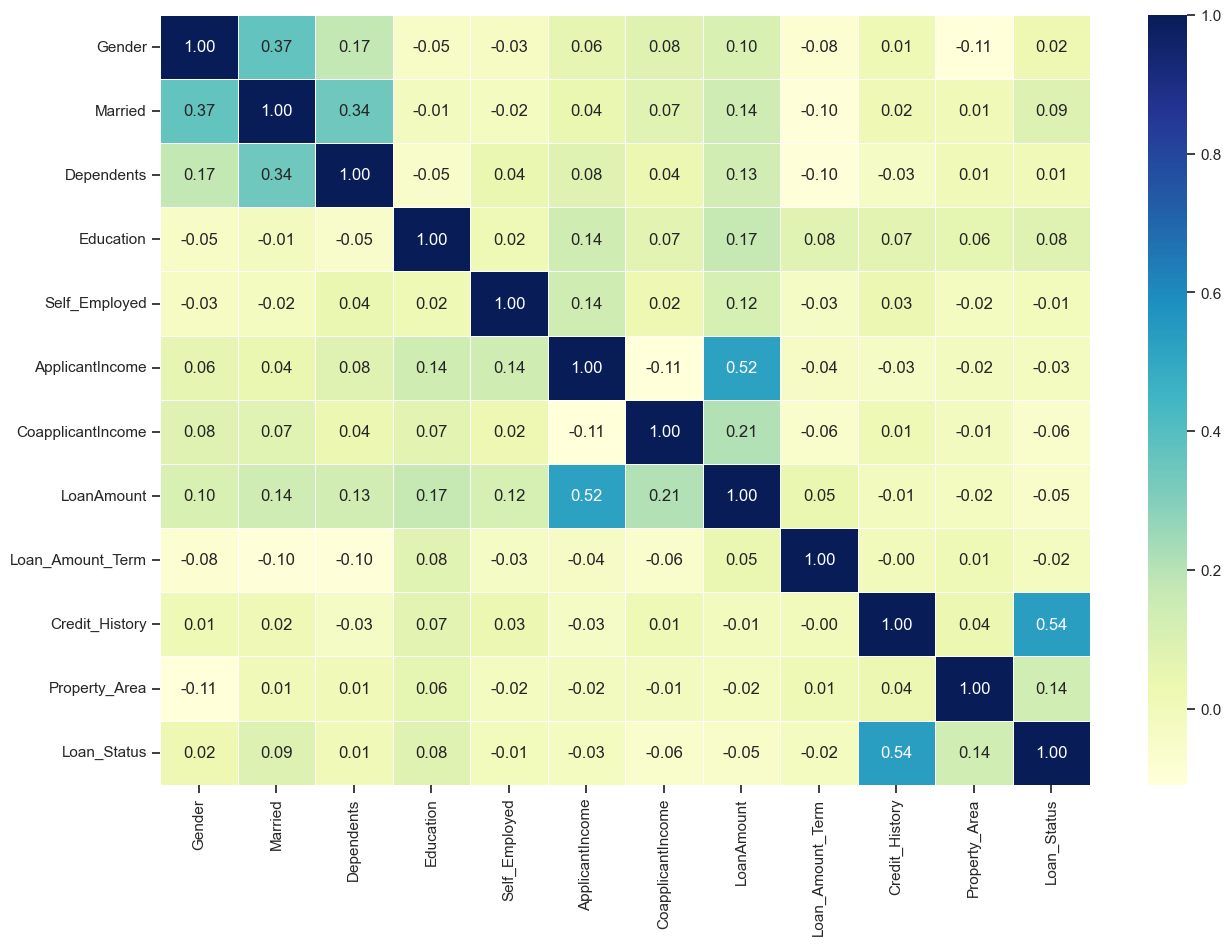

In [59]:
# make our correlation matrix visual
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## Modelling

In [87]:
#importing Libraries
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

#for warning 
from warnings import filterwarnings
filterwarnings("ignore")

Splitting the training and testing sets

In [62]:
#random data shuffelin
df.sample(frac=1)

#Spliting the data
X = df.drop("Loan_Status",axis=1)
y = df["Loan_Status"]
X_train,X_test,y_train,y_test =  train_test_split(X,
                                              y,
                                              test_size=0.2)

In [63]:
(len(X_train),len(X_test))

(478, 120)

Logistic Regression Model

In [68]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);

# Evaluating the model
log_reg = log_reg.score(X_test,y_test)

KNN Model

In [69]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);

# Evaluating the model
knn = knn.score(X_test,y_test)

Random forest classifier

In [70]:
clf= RandomForestClassifier()
clf.fit(X_train,y_train);

# Evaluating the model
clf = clf.score(X_test,y_test)

Support Vector Machine

In [71]:
svm = SVC()
svm.fit(X_train,y_train)

# Evaluating the model
svm = svm.score(X_test,y_test)


Decision Tree Classifier

In [74]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train);

# Evaluating the model
dt = dt.score(X_test, y_test)

Comparison of all the models

In [75]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                           "Support Vector Machine":svm,
                           "Decision Tree Classifier": dt,
                            },index=["accuracy"])

In [76]:
model_compare

,Logistic Regression,KNN,Random Forest Classifier,Support Vector Machine,Decision Tree Classifier
accuracy,0.816667,0.641667,0.816667,0.716667,0.725


Plotting the comparison

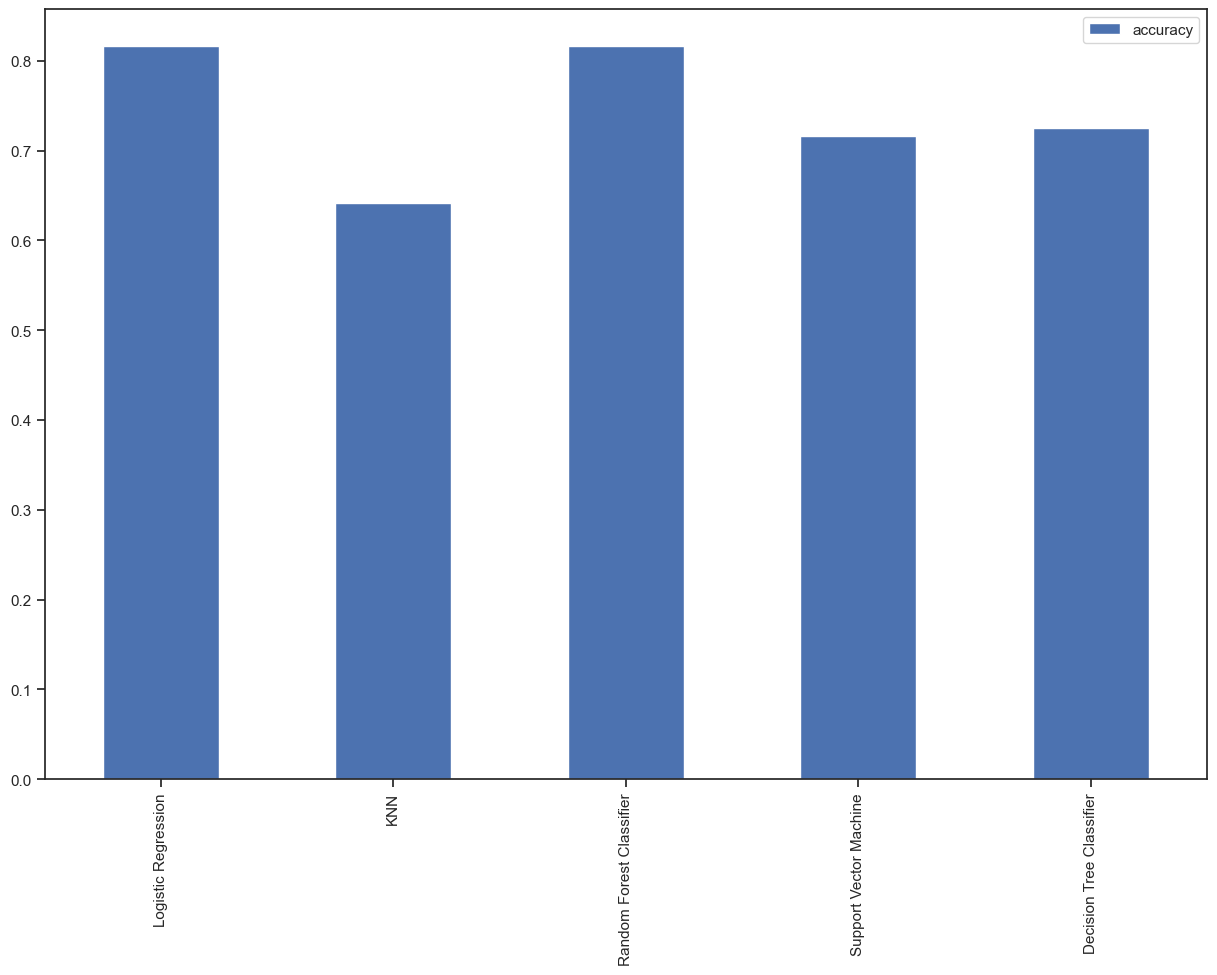

In [77]:
model_compare.T.plot.bar(figsize=(15,10));

Creating a hyperparameter grid for LogisticRegression

In [78]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


Tuning LogisticRegression

In [79]:
np.random.seed(42)

# Setting up random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fitting random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

Evaluating the model

In [80]:
score = rs_log_reg.score(X_test,y_test)
score

0.8166666666666667

In [81]:
log_reg_grid = {'C': np.logspace(-4,4,30),
               "solver":["liblinear"]}

# Setting up  the grid cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fitting grid search cv
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [82]:
gs_log_reg.score(X_test,y_test)

0.825

In [83]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [84]:
np.array(y_test)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [88]:
from sklearn.metrics import roc_curve, auc

In [94]:
print(confusion_matrix(y_test,y_preds))

[[17 17]
 [ 4 82]]


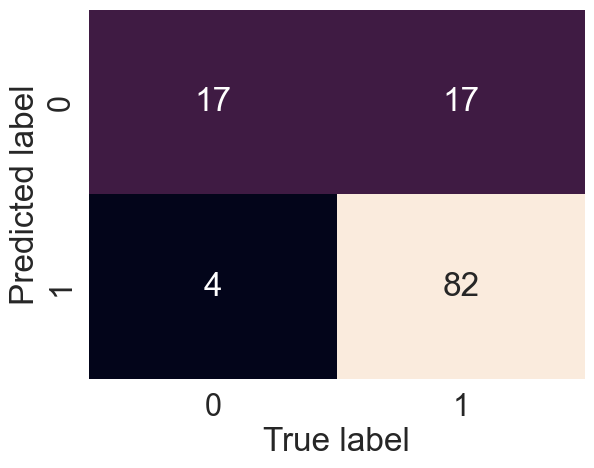

In [95]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [96]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.50      0.62        34
           1       0.83      0.95      0.89        86

    accuracy                           0.82       120
   macro avg       0.82      0.73      0.75       120
weighted avg       0.82      0.82      0.81       120



In [97]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [98]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [99]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="accuracy")
cv_acc

array([0.8       , 0.81666667, 0.75      , 0.78333333, 0.76666667,
       0.8       , 0.86666667, 0.83333333, 0.79661017, 0.83050847])

In [100]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8043785310734464

In [101]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7888940414095005

In [102]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.978048780487805

In [103]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8731645671974967

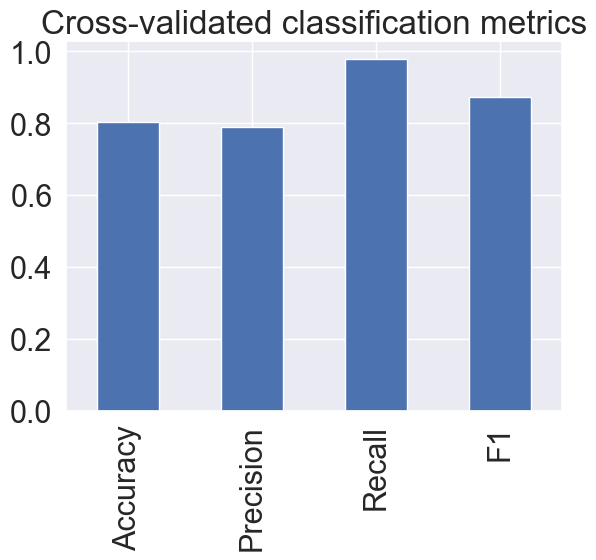

In [104]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [105]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [106]:
clf.coef_

array([[-3.51633423e-02,  4.16636608e-01, -6.05188436e-02,
         2.47512361e-01, -1.53166486e-01, -8.42105276e-06,
        -4.00904807e-05, -2.05450403e-03, -3.13897671e-03,
         2.26708316e+00,  2.63873819e-01]])

In [107]:
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'Loan_ID': -0.0351633423289145,
 'Gender': 0.41663660834098787,
 'Married': -0.06051884363971925,
 'Dependents': 0.24751236099624846,
 'Education': -0.15316648569866026,
 'Self_Employed': -8.421052755638475e-06,
 'ApplicantIncome': -4.00904806594273e-05,
 'CoapplicantIncome': -0.0020545040251150892,
 'LoanAmount': -0.003138976711502557,
 'Loan_Amount_Term': 2.267083163003612,
 'Credit_History': 0.2638738188988953}

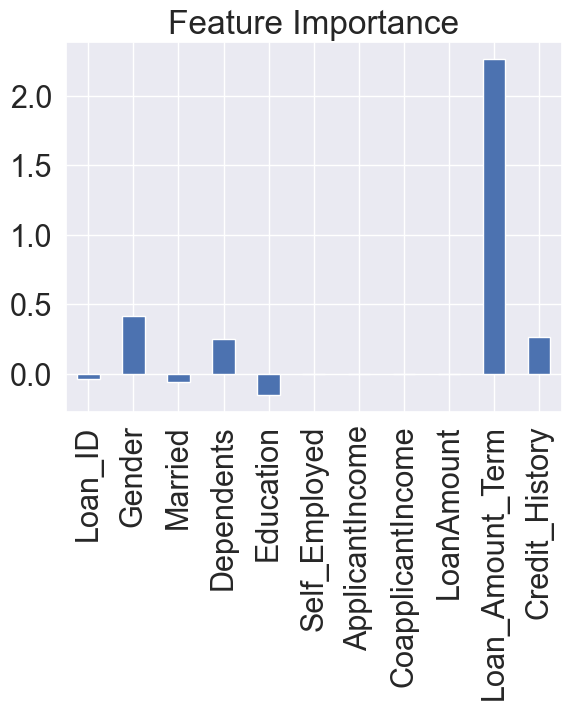

In [108]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## Saving Model

In [116]:
import pickle

In [117]:
pickle.dump(gs_log_reg, open("Loan.pkl", "wb"))

In [118]:
loaded_model = pickle.load(open("Loan.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.825

In [120]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
527,0,1,1.0,1,0,4608,2845.0,140.0,180.0,1.0,2
107,1,1,3.0,0,0,2071,754.0,94.0,480.0,1.0,2
544,1,1,3.0,1,1,10139,0.0,260.0,360.0,1.0,2
152,1,1,3.0,1,0,39999,0.0,600.0,180.0,0.0,2
528,0,0,0.0,1,0,2138,0.0,99.0,360.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
493,1,1,2.0,1,0,3510,4416.0,243.0,360.0,1.0,0
595,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,1
431,1,0,0.0,1,0,3660,5064.0,187.0,360.0,1.0,2
367,1,1,0.0,1,0,4817,923.0,120.0,180.0,1.0,1
